# Total Runs Model -  Random Forest

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import pickle

pd.set_option('display.max_columns', 2105)
pd.set_option('display.max_rows',500)

In [2]:
games = pd.read_csv('../Data/Created/train.csv')

In [3]:
val = pd.read_csv('../Data/Created/test.csv')

In [4]:
features = ['v_ba','h_ba','v_obp','h_obp','v_slg','h_slg','v_ops','h_ops','v_roll_rbis','v_roll_tbs','v_bb_rat','v_sb_rat','h_bb_rat','h_sb_rat','v_k_rat','h_k_rat','v_runs','home_team','visitor_team','park_id']
X = games[features]
y = games['run_diff']

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2023)

In [6]:
categorical_columns = ['home_team', 'visitor_team','park_id']

ct = ColumnTransformer(
    transformers=[
        ('oh', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

In [7]:
pipe = Pipeline([
    ('ct', ct),
    ('rf', RandomForestRegressor())
])

In [8]:
%%time
pipe.fit(X_train, y_train)

CPU times: user 6min, sys: 12.4 s, total: 6min 13s
Wall time: 7min 1s


Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oh',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['home_team', 'visitor_team',
                                                   'park_id'])])),
                ('rf', RandomForestRegressor())])

In [9]:
pipe.score(X_val, y_val)

/Users/justondea/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8624989062772719

In [13]:
mean_absolute_error(y_val, preds)

1.2450204946030878

In [10]:
preds = pipe.predict(X_val)
preds = pd.DataFrame(preds)

/Users/justondea/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


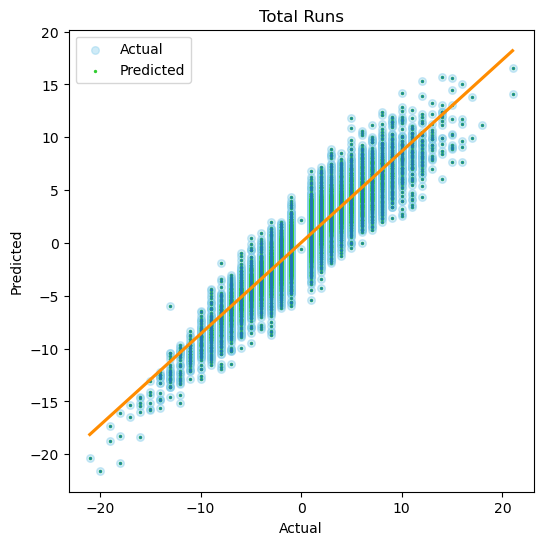

In [11]:
plt.figure(figsize=(6, 6))
plt.scatter(y_val, preds, color='skyblue', label='Actual',alpha=.4, s=30)
plt.scatter(y_val, preds, color='limegreen', label='Predicted', s=2)
sns.regplot(x=y_val, y =preds, scatter_kws={'s': 1}, line_kws={'color':'darkorange'}, ci=None)
plt.title('Total Runs')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend();